In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
x = np.array([1., 2., 3., 4., 5.])
y = np.array([1., 3., 2., 3., 5.])

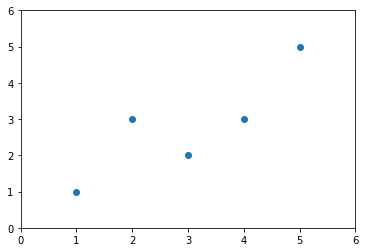

In [6]:
plt.scatter(x, y)
plt.axis([0, 6, 0, 6])
plt.show()

![](http://windmissing.github.io/images/2019/48.png)

In [7]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [8]:
num = 0.0
d = 0.0
for x_i, y_i in zip(x, y):
    num += (x_i - x_mean) * (y_i - y_mean)
    d += (x_i - x_mean) ** 2

In [9]:
a = num / d
a

0.8

In [10]:
b = y_mean - a * x_mean
b

0.39999999999999947

In [11]:
y_hat = a * x + b

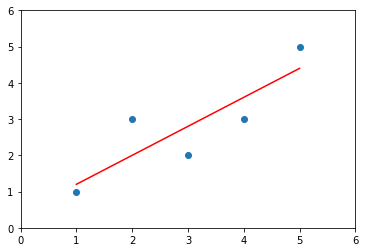

In [12]:
plt.scatter(x, y)
plt.plot(x, y_hat, color='r')
plt.axis([0, 6, 0, 6])
plt.show()

In [13]:
x_predict = 6
y_predict = a * x_predict + b
y_predict

5.2

### 使用我们自己的SimpleLinearRegression

In [14]:
import numpy as np

class SimpleLinearRegression1:
    def __init__(self):
        """初始化Single Linear Regression模型"""
        self.a_ = None
        self.b_ = None
        
    def fit(self, x_train, y_train):
        """根据训练数据集X_train, y_train训练Single Linear Regression模型"""
        assert x_train.ndim == 1, "Simple Linear Regressor can only solve single feature training data"
        assert len(x_train) == len(y_train), "the size of x_train must be equal to the size of y_train"
        
        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)

        num = 0.0
        d = 0.0
        for x_i, y_i in zip(x_train, y_train):
            num += (x_i - x_mean) * (y_i - y_mean)
            d += (x_i - x_mean) ** 2

        self.a_ = num / d
        self.b_ = y_mean - self.a_ * x_mean
        
    def predict(self, x_predict):
        """给定待测数据集X_predict，返回表示x_predict的结果向量"""
        assert x_predict.ndim == 1, "Simple Linear Regressor can only solve single feature training data"
        assert self.a_ is not None and self.b_ is not None, "must fit before predict"
        return [self._predict(x) for x in x_predict]
    
    def _predict(self, x_single):
        """给定单个待预测数据s_single，返回x_single的预测结果"""
        return self.a_ * x_single + self.b_
    
    def __repr__(self):
        return "SimpleLinearRegression1()"

In [15]:
reg1 = SimpleLinearRegression1()
reg1.fit(x, y)

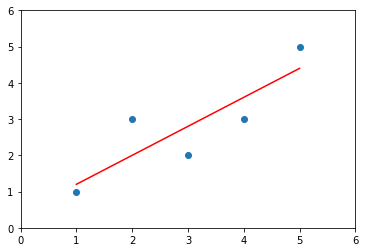

In [17]:
y_hat1 = reg1.predict(x)

plt.scatter(x, y)
plt.plot(x, y_hat1, color='r')
plt.axis([0, 6, 0, 6])
plt.show()